**Conferencia ofrecida al Grupo de Investigación del ICFES**

Septiembre 25, 2020

# Modelos TRIM

##  Autores

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co

## Contenido

* [Introducción](#Introducción)
* [Introducción al modelo TRIM](#Introducción-al-modelo-TRIM)
* [Modelo Matemático](#Modelo-Matemático)
* [Interpretación del modelo](#Interpretación-del-modelo)
* [Constructos medidos por el modelo MIRT](#Constructos-medidos-por-el-modelo-MIRT)
* [Estimación usando autoencoders variacionales](#Estimación-usando-autoencoders-variacionales)
* [Planteamiento del problema variacional](#Planteamiento-del-problema-variacional)

## Introducción

En esta charla se introducecen los modelos de teoría de respuesta al ítem multidimensionales en un marco de trabajo moderno que incluye los conceptos de inferencia variacional y autoencoders.

## Introducción al modelo TRIM

En esta sección se supone que una prueba ha sido diseñada para medir $m$ trazos latentes. En principio se sabe que se han diseñado items para cada medir cada trazo latente. No obstante lo anterior, es común que el conjunto de datos resultante de aplicar la prueba tenga una dimensión digamos $d\ge m$. Existen diferentes técnicas para determinar la dimensión del conjunto de datos. Algunos se basan en métodos factoriales lineales como el análisis de componentes principales (ACP) y otros en métodos no lineales, como por ejemplo los métodos basados en el concepto de $q$-dimensión. En este trabajo supondremos que la dimensión del conjuntos de datos resultante de aplicar la prueba es $d$ y que ésta es conocida en adelante.

Supondremos por otro lado que se trata de una prueba de admisión y que el instrumento resultante es un cuestionario, en el cual las respuestas se codifican en un esquema de multiple opción con solamente una respuesta correcta. En consecuencia, las respuestas son codificadas como 1 (uno), si la respuesta e correcta y 0 (cero) en caso contrario. Si la prueba consta de $p$ ítems y es aplicada a $N$ personas, el conjunto de respuestas resultante puede codificarse como una matriz binaria de tamaño $N \times p$ y que en lo sucesivo denotaremos por $\mathbf{X}$.

Desde el punto de vista psicométrico se asume  que este conjunto de ítems seleccionados para la prueba permite *medir* de manera aproximada los trazos latentes, lo cual es el objetivo de la prueba. Los trazos latentes que mide realmente la prueba se representarán como una matriz tamaño $N \times d$ y  en lo sucesivo denotaremos por $\mathbf{Z}$. Por razones puramente técnicas es posible que los trazos latentes que se predicen con un modelo TRI no coincidan directamente con los trazos que se busca medir. Esto se debe a que los modelos tienen múltiples soluciones, es decir son modelos que no son identificables. Esto no es realmente un problema, si los ítems asociados a cada trazo trazo latentes están plenamente identificados, como es el caso en aplicaciones prácticas. 

El término mutidimensional se utiliza para indicar que hay más de un trazo latente medido en una prueba, como es el caso de la pruebas de admisión. Cada trazo latente antes de ser predicho es representado por una variable latente. En consecuencia, el conjunto de trazos latentes de un individuo antes de ser medido es un vector aleatorio. Se sabe que en general en tal vector de trazos latentes las componentes no son independientes. Esto implica que hacer predicciones de los trazo latentes por separado introduce un sesgo. Por ello, lo más recomendado es usar modelos multidimensionales que permitan incluir la estructura de asociación (correlación, en un sentido lineal)  de los trazos.

Un efecto pŕáctico de tener en cuenta la estructura de correlación de los trazos latentes, es decir el uso de modelos multidimensionbales,  es que es posible hacer pruebas más cortas, debido a la información compartida que transportan los trazos latentes.


## Modelo Matemático

El objetivo central en la teoría de respuesta al ítem es la predicción de vectores de trazos latentes de los individuos. Denotaremos por $\mathbf{x}_i$ al vector de respuestas del individuo $i$ en la prueba. Dado que la prueba tiene $p$ ítems, se tiene que $\mathbf{x}_i$ es dado por $\mathbf{x}_i = (x_{i1},\ldots, x_{ip} )^{'}$. El vector de trazos latentes que se desea predecir para dicho individuo se denota  $\mathbf{z}_i$ y se tiene que $\mathbf{z}_i =(z_{i1},\ldots, z_{id} )^{'}$. con $d << p$.

A su vez, cada ítem $j, j=1,\ldots, p$ tiene parámetros. En este trabajo se utilizarán modelos que tiene dos tipos de parámetros: un parámetro de dirección y un  parámetro de posición. 


El parámetro de dirección para el ítem $j$ se denotará  por $\mathbf{w}_j$. Este vector corresponde a una dirección en el espacio latente, es decir, el espacio de los vectores latentes.  Por lo tanto se tiene que $\mathbf{w}_j=(w_{j1},\ldots, w_{jd} )^{'}=$. Por otro lado, el parámetro de posición se denota por $b_j$.

Un vector de respuestas digamos $\mathbf{x}$ antes de ser observado es un vector aleatorio de variables dicotómicas. La probabilidad condicional $Pr[x_{ij}=1| \mathbf{z}_i, \mathbf{w}_j, b_j]$ se define mediante la expresión

$$
\pi_{ij}=Pr[x_{ij}=1| \mathbf{z}_i, \mathbf{w}_j, b_j] = H(\mathbf{w}_j^{'}\mathbf{z}_i + b_j),
$$

en donde $H$ es una función de enlace, la cual transforma el espacio Euclideano $\mathbb{R}$ en el intervalo $[0,1]$. Obsérvese que $H$ puede ser una función de distribución acumulada. Aquí usaremos el sigmoide clásico definida la función $\text{logit}^{-1}$. Se tiene entonces que

$$
\pi_{ij}=Pr[x_{ij}=1| \mathbf{z}_i, \mathbf{w}_j, b_j] = \frac{1}{1  + \exp (-(\mathbf{w}_j^{'}\mathbf{z}_i + b_j))}.
$$

Sea $a_j$ la norma Euclidiana del vector $\mathbf{w}_j$. Entonces $\mathbf{w}_j$ puede escribirse como $\mathbf{w}_j = a_j\boldsymbol{\beta}_j$, en donde $\boldsymbol{\beta}_j$ es un vector unitario. Definamos $\delta_j = - b_j/a_j$. Entonces la probabilidad $Pr[x_{ij}=1| \mathbf{z}_i, \mathbf{w}_j, b_j]$ puede reescribirse como

$$
\pi_{ij}=Pr[x_{ij}=1| \mathbf{z}_i, \mathbf{w}_j, b_j] = \frac{1}{1  + \exp [-(a_j(\boldsymbol{\beta}_j^{'}\mathbf{z}_i - \delta_j)]}.
$$

## Interpretación del modelo

Sea  $\boldsymbol{\xi} = (\alpha, \boldsymbol{\beta}^{'},\delta)^{'} $  el vector de parámetros de un item. Por facilidad, en esta sección, nos referimos únicamente a un ítem, por lo que omitiremos el subíndice $j$. Si se considera que los parámetros del ítem son conocidos, lo puede considerarse cierto una vez han sido estimados, la probabilidad de respuesta correcta es una función de $\mathbf{z}$ la cual se conoce como función de respuesta y que denotaremos $f_{\xi}(\mathbf{z})$. 

Entonces se tiene que

$$
f_{\xi}(z) = \frac{1}{1  + \exp [-(a(\boldsymbol{\beta}^{'}\mathbf{z} - \delta)]}
$$



Para fijar las ideas, supongamos que  $\alpha= 0.8$, $\boldsymbol{\beta}=\tfrac{1}{\sqrt{2}}(1.0,1.0)^{'}$ y $\delta= 1.0$. La siguente es una imagen parcial de la función de respuesta $
f_{\xi}(z)$.

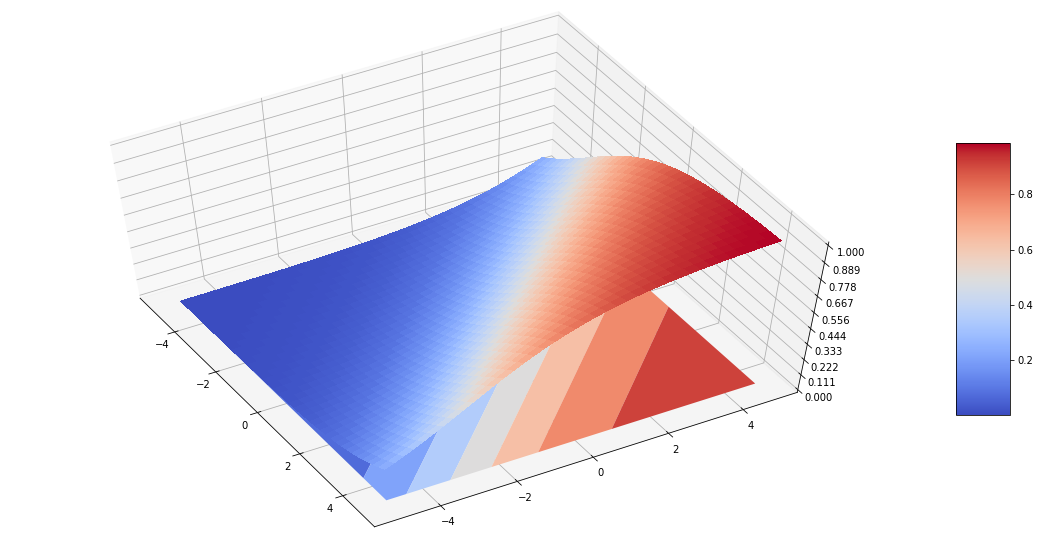

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np



fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(20,10))

#plt.figure(figsize=(20,10)) 

# Make data.
x_min = -5.0
y_min = -5.0
x_max = 5.0
y_max = 5.0
delta_x = 0.25
delta_y = 0.25

alpha  = 0.8
beta_1 = 1/np.sqrt(2)
beta_2 = 1/np.sqrt(2)
delta  = 1.0

X = np.arange(x_min, x_max, delta_x)
Y = np.arange(y_min, y_max, delta_y)
X, Y = np.meshgrid(X, Y)
Z = 1/ (1+ np.exp(-(alpha*(beta_1*X+beta_2*Y)-delta)))


ax.view_init(elev=60, azim= -30)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False )
cset = ax.contourf(X, Y, Z, zdir='z', offset=0.0, cmap=cm.coolwarm, 
         antialiased=True)

# Customize the z axis.
ax.set_zlim(0.0, 1.00)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

La gráfica revela aspectos importantes para interpretación. En el piso se observan las línea de equiprobabilidad. Estas son perpendiculares al al vector $\boldsymbol{\beta}$. Se verifica fácilmente, por que si el vector latente $\mathbf{z}$ es ortogonal a $\boldsymbol{\beta}$, entonces $\boldsymbol{\beta}'\mathbf{z} $ y en consecuencia $f_{\xi}(z)= [1+ e^{a\delta}]^{-1}$. En este caso la probabilidad queda determinada únicamente por los valores $a\delta = -b$. 

Por otro lado observe que si $\boldsymbol{\beta}'\mathbf{z} = \delta$, entonces $f_{\xi}(z)= 0.5$.

### Modelo Unidimensional a lo largo de la dirección de un ítem

Consideremos el plano en dirección del vector $\boldsymbol{\beta}$ que es perpendicular a los ejes coordenado del espacio latente. En la imagen arriba, el espacio latente es el plano sobre el que se levanta la función $f_{\xi}(z)$. El resultado es una curva cuya ecuación es dada por

$$
f_{a,d}(\theta) =\frac{1}{ [1+ e^{-a(\theta-\delta)}]}
$$


<figure>
<center>
<img src="../Imagenes/IntersectionCurve3d_03.jpg" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Curva de intersección</p>
</figcaption>
</figure>

Este es el modelo logístico TRI unidimensional de dos parámetros (2PL). Aquí simplemente se hizo la identicación $\theta= \boldsymbol{\beta}'\mathbf{z}$. Es decir, $\theta$ es la proyección del trazo latente a lo largo de la dirección $\boldsymbol{\beta}$. Por lo que se tiene las siguientes interpretaciones directas.

1. Cada item está determinado por una dirección $\boldsymbol{\beta}$ en el espacio de los trazos latentes. Esa dirección mide realmente un rasgo de los individuos. La medición de ese rasgo para un individuo con trazo latente $\mathbf{z}$ es dada por $\theta= \boldsymbol{\beta}'\mathbf{z}$.
2. el parámetro delta determina la posición a lo largo de la dirección del item, en donce la probabilidad de responder correctamente es exáctamente 0.5. En el caso unidimensional este parámetro se llama la posición del item. Aquí podemos hacer la misma interpretación. Observe que en coordenadas cartesianas la posición de un ítem es exáctamente $\delta\boldsymbol{\beta}$. En resumen, $\delta$ y en consecuencia $b/a$ es un parámetro de posición. Por eso, el profesor Reckcase, por ejemplo en su libro [Multidimensional Item Response Theory](http://library.lol/main/92E280841687156C73AAA1C19487645B) lo define como MDIFF, el parámetro de dificultad muiltidimensional. 
3. El parámetro $a$ es el parámetro de discriminación del item a lo largo de su dirección. El profesor Reckase lo define por MDISC, el parámetro dificultad multidimensional.


<figure>
<center>
<img src="../Imagenes/IRF.jpg" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Modelo 2pl</p>
</figcaption>
</figure>

## Constructos medidos por el modelo MIRT

Según todo lo anterior, es justo preguntarse ¿Qué se mide realmente?


Esta es una pregunta fundamental. Su importancia radica en que en general, 


**no existen pruebas que sean realmente unidimensionales**.


<figure>
<center>
<img src="../Imagenes/eigenvalues_plot_UN.jpg" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Valores propios. Prueba UN</p>
</figcaption>
</figure>

Por lo tanto es necesario cuestionarse que miden los trazos latentes en el modelo MIRT. La respuesta no es simple, pero vamos a darle una breve mirada.

Por un lado, estos modelos no son identificables, por lo que es necesario incluir restricciones para obtener una versión en el proceso de estimación.

No podemos entrar en detalles, pero supongamos que hemos obtenido una estimación de los parámetros de los ítems, por lo que se tienen parejas de items $(\boldsymbol{\beta}_j, \delta_j), j=1,\cdots, p$. UN proceso simple de clustering a partir de las direcciones $\boldsymbol{\beta}_j$, permite agrupar los ítems en grupos que constituyen cosntructos. Los *constructos naturales* medidos por la prueba. 

### Constructos naturales medidos por un modelo TRIM

Una análisis estadístico de estas agrupaciones debe permitir al experto determinar que mide cada grupo de items. Un ejemplo podría ser, la habilidad para leer tablas de datos. Porque por ejemplos los items de esta agrupación están asociados a la lectura e interpretación de tablas de datos.

Los grupos deben ser construido de tal forma que constituyan subtest aproximadamente unidimensionales.

<figure>
<center>
<img src="../Imagenes/lsmirt_ditrections.jpg" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Constructos de la prueba</p>
</figcaption>
</figure>

Las direcciones rojas en la imagen corresponden a direcciones principales de los ítems, la cuales pueden calcularse fácilmente. Esas direcciones son las direcciones de los constructos.

Una calificación del cosntructo se obtien proyectando el vector latente sobre la dirección principal del constructo.

### Constructos administrativos

e recuperan simplemente hallando la dirección principal de los ítems aosciados al constructo correspondiente, digamos matemáticas.

## Estimación usando autoencoders variacionales

<figure>
<center>
<img src="../Imagenes/vae-tri.png" width="500" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Autoencoder variaacional y la prueba</p>
</figcaption>
</figure>

El propósito de la inferencia variacional es aproximar una densidad haciendo una paso intermedio por un espacio de variables latentes.

El proceso  puede ser imaginado de una forma análoga a la construcción de un codificador en variables latentes.

<figure>
<center>
<img src="../Imagenes/Probabilistico.png" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Autoencoder variacional </p>
</figcaption>
</figure>

## Planteamiento del problema variacional

Supongamos que $p_{\theta}(\mathbf{x})$ es la densidad asociada a un vector aleatorio de respuesta. El problema estadístico en principio es estimar el parámetro $\theta$ que indexa a la distribución.

Si se asume que $\mathbf{z}$ es el vector latente asociado a $\mathbf{x}$  se tiene que

$$
P_{\theta}(\mathbf{x}) = \int p_{\theta}(\mathbf{x},\mathbf{z})d\mathbf{z}.
$$ 

A partir de esta ecuación se puede escribir que 


$$
P_{\theta}(\mathbf{x})  = \int P_{\theta}(\mathbf{x}|\mathbf{z})P(\mathbf{z})d\mathbf{z},
$$

en donde $P(\mathbf{z})$ es la distribución marginal del vector latente $\mathbf{z}$. Esta expresión muestra el modelo generativo en el problema. Observese que una muestra de la distribución $P_{\theta}(\mathbf{x})$ puede ser obtenido como sigue:

1. Genere una muestra $\mathbf{z}\sim P(\mathbf{z})$
2. Genere una muestra de $P_{\theta}(\mathbf{x}|\mathbf{z})$.

El problema es que en general $P_{\theta}(\mathbf{x}|\mathbf{z})$ es intratable, en el sentido que por un lado la integral no puede obtenerse de forma directa y muestras de $P_{\theta}(\mathbf{x}|\mathbf{z})$  tampoco se obtienen directamente, dado que precisamente se desconoce el parámetro $\theta$. Obviamente al comienzo la marginal $P(\mathbf{z})$ es desconocida

Observe que adicionalmente 

$$
P_{\theta}(\mathbf{x})= \int P_{\theta}(\mathbf{z}|\mathbf{x})P(\mathbf{x})d\mathbf{z}.
$$

Un esquema de muestreo para $\mathbf{z}$ se deriva de esta ecuación:

1. Dada una muestra $\mathbf{x} \sim P_{\theta}(x)$, es decir una muestra en la entrada de la red.
2. Se obtiene una muestra $\mathbf{z}\sim P_{\theta}(\mathbf{z}|\mathbf{x})$.


El problema es que en general $P_{\theta}(\mathbf{z}|\mathbf{x})$ es intratable. Lo que vamos a hacer para obtener la muestras $\mathbf{z}$ es obtener una densidad aproximada $Q_{\phi}(\mathbf{z}|\mathbf{x})$ en una familia conocida.

En esta lección lo que haremos es proponer una aproximación del tipo $Q_{\phi}(\mathbf{z}|\mathbf{x})= \mathcal{N}_m(\boldsymbol{\mu}(\mathbf{x}),\text{diag}(\boldsymbol{\sigma}(\mathbf{x})^2)) $.
 
 

### Aproximación Variacional

Con el propósito de convertir $p_{\theta}(\mathbf{z}|\mathbf{x})$ en una función de densidad tratable la solución propuesta desde la inferencia variacional es la introducción de una densidad aproximada $Q_{\phi}(\mathbf{z}|\mathbf{x})$ de tal manera que

$$
Q_{\phi}(\mathbf{z}|\mathbf{x}) \approx P_{\theta}(\mathbf{z}|\mathbf{x}).
$$

La densidad $Q_{\phi}(\mathbf{z}|\mathbf{x})$ se escoge en una familia de distribuciones tratables indexadas por $\phi$. Es común escoger $Q_{\phi}(\mathbf{z}|\mathbf{x})$ en la familia normal multivariada. Eso haremos en esta lección. 

Entonces para cada $\mathbf{x}$ tendremos que

$$
Q_{\phi}(\mathbf{z}|\mathbf{x}) = \mathcal{N}(\mathbf{z}; \boldsymbol{\mu}(\mathbf{x}), \text{diag}(\boldsymbol{\sigma}(\mathbf{x})^2)
$$

$\boldsymbol{\mu}(\mathbf{x})$ es el vector de medias (condicionadas por $\mathbf{x}$) y $(\boldsymbol{\sigma}(\mathbf{x})$ es un vector de desviaciones estándar. Como la matriz de covarianza es diagonal, se está asumiendo que las componentes del vector $\mathbf{z}$ son condicionalmente independientes, dado el vector  $\mathbf{x}$.

### Divergencia Kullback-Leibler (KL)

Una vez se ha definido la familia de disgtribuciones a partir de la cual se obtendrá la aproximación $Q_{\phi}(\mathbf{z}|\mathbf{x})$ el siguiente paso es deicidir como medir la proximidad o la discrepancia de la densidad aproximante con la densidad original. La solución sugerida desde la inferencia variacional es usar la divergencia KL, la cual se define por

$$
D_{KL}(Q_{\phi}\left(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z}|\mathbf{x})\right)  = \mathbb{E}_{\phi}(\log Q_{\phi}\left(\mathbf{z}|\mathbf{x}) - \log p_{\theta}(\mathbf{z}|\mathbf{x})\right)).
$$

El símbolo $\mathbb{E}_{\phi}$ indica que la esperanza es con respecto a la densidad $Q_{\phi}\left(\mathbf{z}|\mathbf{x}\right)$.

### Cota inferior de la evidencia (ELBO)

El objetivo en la inferencia variacional es encontrar una densidad aproximante $Q_{\phi}(\mathbf{z}|\mathbf{x})$  para la densidad $p_{\theta}(\mathbf{z}|\mathbf{x})$ utilizando como métrica la divergencia KL, que por cierto no es una distancia, dado que no es simétrica.

A partir del teorema de Bayes se obtiene que 

$$
P_{\theta}(\mathbf{z}|\mathbf{x})= \frac{P_{\theta}(\mathbf{x}|\mathbf{z})P_{\theta}(\mathbf{z})}{P_{\theta}(\mathbf{x})}
$$

Por lo que la divergencia KL se transforma en

$$
D_{KL}(Q_{\phi}(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z}|\mathbf{x}))  = \mathbb{E}_{\phi}(\log Q_{\phi}\left(\mathbf{z}|\mathbf{x}) - \log p_{\theta}(\mathbf{x}|\mathbf{z})- \log P_{\theta}(\mathbf{z})\right)) + \log P_{\theta}(\mathbf{x}).
$$

De donde se obtiene que


$$
\log P_{\theta}(\mathbf{x}) - 
D_{KL}[Q_{\phi}(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z}|\mathbf{x})] = \mathbb{E}_{\phi}[\log p_{\theta}(\mathbf{x}|\mathbf{z})]-
D_{KL}[Q_{\phi}(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z})]
$$

Esta ecuación constituye el núcleo de la inferencia variacional. El lado izquierdo de la ecuación  contiene el término $P_{\theta}(\mathbf{x})$ que se busca maximizar menos el error de la aproximación medido por $D_{KL}[Q_{\phi}(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z}|\mathbf{x})]$ que se espera  sea aproximadamente cero. 


Se sabe que la divergencia KL siempre es positiva, por lo que la parte izquierda de la ecuación se denomina como la cota inferior de la evidencia (**ELBO**) del inglés *evidence lower bound*.

### Optimización

La ecuación clave d ela inferencia variacional es dada por

$$
\begin{align}
\text{ELBO}  & = 
\log P_{\theta}(\mathbf{x}) - 
D_{KL}[Q_{\phi}(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z}|\mathbf{x})] \\
&= \mathbb{E}_{\phi}[\log p_{\theta}(\mathbf{x}|\mathbf{z})]-
D_{KL}[Q_{\phi}(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z})]
\end{align}
$$


El proceso de optimización se basa en la segunda parte ecuación, por lo que usaremos al definición

$$
\text{ELBO}  = \mathbb{E}_{\phi}[\log p_{\theta}(\mathbf{x}|\mathbf{z})]-
D_{KL}[Q_{\phi}(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z})]
$$


El término $\mathbb{E}_{\phi}[\log p_{\theta}(\mathbf{x}|\mathbf{z})]$ corresponde al modelo generativo en el problema. La interpretación estadística de esta término es que el modelo generador toma muestras obtenidas de la salida del modelo latente $P_{\theta}(\mathbf{z}|\mathbf{x})$, el cual estamos aproximando con $Q_{\phi}(\mathbf{z}|\mathbf{x})$. Es decir, se genera una muestra $\mathbf{z} \sim Q_{\phi}(\mathbf{z}|\mathbf{x})$ y partir de esta se trata de reconstruir la entrada $\mathbf{x}$.

En el ejemplo propuesto, si se considera que se tiene vectores dicotómicos, se asume una distribución de Bernoulli para cada componente. Si las respuestas son condicionalmente independientes dado el vector $\mathbf{z}$ entonces la función de pérdida es la entropía cruzada binaria $\mathcal{L}_R$ dada por

$$
\mathcal{L}_R = \frac{1}{d}\sum_{j=1}^d x_j \log p(\mathbf{w}_j'\mathbf{z} + b_j) + (1-x_j)\log(1-p(\mathbf{w}_j'\mathbf{z} + b_j))
$$


El segundo término $D_{KL}[Q_{\phi}(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z})]$ puede ser evaluado directamente. Como asumimos que $Q_{\phi}$ es una distribución Gaussiana y si se tiene en cuenta que típicamente $P_{\theta}(\mathbf{z})= P(\mathbf{z})=\mathcal{N}(\mathbf{0},\mathbf{I})$, se obtiene que 

$$
D_{KL}[Q_{\phi}(\mathbf{z}|\mathbf{x})|| p_{\theta}(\mathbf{z})]= \frac{1}{2} \sum_{j=1}^{d} (1+\log(\sigma_j)^2 - (\mu_j)^2-(\sigma_j)^2)
$$

Tanto $\mu_j$ como $\sigma_j$ son funciones de la entrada $\mathbf{x}$ ue se estiman en el modelo de inferencia.

Para minimizar $\mathcal{L}_{KL} =D_{KL}$, se requiere que $\mu_j\to 0$ y $\sigma_j\to 1$.

En resumen para el problema de inferencia variacional la función de pérdida es dada por

$$
\mathcal{L}_{VAE} = \mathcal{L}_{R} + \mathcal{L}_{KL}
$$

### Autoencoder Variacional

El objetivo del codificador en un autoencoder variacional es aproximar $Q_{\phi}(\mathbf{z}|\mathbf{x})$ mediante una red neuronal profunda.

Tanto la media $\boldsymbol{\mu}(\mathbf{x})$ como el vector de desviaciones  estándar $\boldsymbol{\sigma}(\mathbf{x})$ son estimados por la red neuronal codificadora (encoder).

El decodificador toma muestras latentes $\mathbf{z}$ con el propósito de reconstruir la entrada como $\tilde{\mathbf{x}}$.

### El truco de la reparametrización


Los gradientes de propagación hacia atrás no pueden pasar por el bloque de muestreo estocástico. Si bien está bien tener entradas estocásticas para redes neuronales, no es posible  pasar los gradientes por una capa estocástica. La solución a este problema es eliminar el proceso de muestreo como entrada, como se muestra en el lado derecho de la siguiente figura. 

Desde el punto de vista estadístico, esto es bastante simple. Se usa la representación estocástica clasica de una distribución normal multivariada asi:

1. Genera una muestra $\boldsymbol{\epsilon} \sim \mathcal{N}_m(\mathbf{0}, \mathbf{I})$.
2. Obtiene $\mathbf{z} =\boldsymbol{\mu} + \boldsymbol{\epsilon} \odot  \boldsymbol{\sigma}$.

En consecuencia $\mathbf{z}\sim \mathcal{N}_m(\boldsymbol{\mu},\text{diag}( \boldsymbol{\sigma}^2))$.

[Regresar al inicio](#Contenido)